# Comparação Desempenhos

In [31]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def roda_com_entrada(executavel, arquivo_in):
    with open(f"in/{arquivo_in}") as f:
        start = time.perf_counter()
        proc = subprocess.run([f"./exe/{executavel}"], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

In [17]:
executaveis = ["smith-waterman","busca-local","busca-local-melhorada"]
arquivos=[]
for i in range(20):
    arquivos.append(f"dna{i}.seq")

In [18]:
arquivos

['dna0.seq',
 'dna1.seq',
 'dna2.seq',
 'dna3.seq',
 'dna4.seq',
 'dna5.seq',
 'dna6.seq',
 'dna7.seq',
 'dna8.seq',
 'dna9.seq',
 'dna10.seq',
 'dna11.seq',
 'dna12.seq',
 'dna13.seq',
 'dna14.seq',
 'dna15.seq',
 'dna16.seq',
 'dna17.seq',
 'dna18.seq',
 'dna19.seq']

In [27]:
dic={}
for executavel in executaveis:
    print(executavel)
    dic[executavel] = {
        "results": None,
        "times" : None
    }
    results=[]
    times=[]
    for arquivo_in in arquivos:
        print(arquivo_in)
        
        desempenho = roda_com_entrada(executavel, arquivo_in)
        results.append(desempenho[0])
        times.append(desempenho[1])
    
    print(results,"\n")
    print(times,"\n")
    dic[executavel]["results"] = results
    dic[executavel]["times"] = times


smith-waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
dna10.seq
dna11.seq
dna12.seq
dna13.seq
dna14.seq
dna15.seq
dna16.seq
dna17.seq
dna18.seq
dna19.seq
['7', '37', '52', '94', '118', '153', '184', '197', '235', '282', '313', '316', '333', '396', '407', '439', '488', '', '', ''] 

[0.011834548000479117, 0.0064666500002203975, 0.0050219100012327544, 0.004770935000124155, 0.004319335001127911, 0.004432219999216613, 0.004995404000510462, 0.007179443000495667, 0.006260107000343851, 0.007134288000088418, 0.007787906000885414, 0.008978342999398592, 0.010055602999273106, 0.01125753300038923, 0.013065028999335482, 0.014825483000095119, 0.016444716999103548, 0.12824309099960374, 0.12447986299957847, 0.1318977189985162] 

busca-local
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
dna10.seq
dna11.seq
dna12.seq
dna13.seq
dna14.seq
dna15.seq
dna16.seq
dna17.seq
dna18.seq
dna19.seq
['5', '15', '8', '13', '

In [28]:
dic

{'smith-waterman': {'results': ['7',
   '37',
   '52',
   '94',
   '118',
   '153',
   '184',
   '197',
   '235',
   '282',
   '313',
   '316',
   '333',
   '396',
   '407',
   '439',
   '488',
   '',
   '',
   ''],
  'times': [0.011834548000479117,
   0.0064666500002203975,
   0.0050219100012327544,
   0.004770935000124155,
   0.004319335001127911,
   0.004432219999216613,
   0.004995404000510462,
   0.007179443000495667,
   0.006260107000343851,
   0.007134288000088418,
   0.007787906000885414,
   0.008978342999398592,
   0.010055602999273106,
   0.01125753300038923,
   0.013065028999335482,
   0.014825483000095119,
   0.016444716999103548,
   0.12824309099960374,
   0.12447986299957847,
   0.1318977189985162]},
 'busca-local': {'results': ['5',
   '15',
   '8',
   '13',
   '15',
   '14',
   '11',
   '11',
   '7',
   '8',
   '11',
   '8',
   '18',
   '11',
   '7',
   '9',
   '9',
   '10',
   '11',
   '10'],
  'times': [0.0041607460007071495,
   0.006143123000583728,
   0.009221987000

[0.010819000000992673, 0.013382009999986622, 0.021251047000987455]

In [32]:
df = pd.DataFrame(dic)
df

,smith-waterman,busca-local,busca-local-melhorada
results,"[7, 37, 52, 94, 118, 153, 184, 197, 235, 282, ...","[5, 15, 8, 13, 15, 14, 11, 11, 7, 8, 11, 8, 18...","[7, 37, 52, 94, 118, 152, 184, 197, 235, 282, ..."
times,"[0.011834548000479117, 0.0064666500002203975, ...","[0.0041607460007071495, 0.006143123000583728, ...","[0.009585046998836333, 0.12612328700015496, 0...."


In [33]:
# https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
reformed_dict = {}
for outerKey, innerDict in dic.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values
        
multiIndex_df = pd.DataFrame(reformed_dict)
multiIndex_df

smith-waterman           busca-local           busca-local-melhorada  \
          results     times     results     times               results   
0               7  0.011835           5  0.004161                     7   
1              37  0.006467          15  0.006143                    37   
2              52  0.005022           8  0.009222                    52   
3              94  0.004771          13  0.012518                    94   
4             118  0.004319          15  0.015359                   118   
5             153  0.004432          14  0.018288                   152   
6             184  0.004995          11  0.021200                   184   
7             197  0.007179          11  0.025080                   197   
8             235  0.006260           7  0.027485                   235   
9             282  0.007134           8  0.030687                   282   
10            313  0.007788          11  0.034683                   311   
11            316  0.008978           8  0.038509                   314   
12            333  0.010056          18  0.040607                   333   
13            396  0.011258          11  0.043640                   394   
14            407  0.013065           7  0.048353                   405   
15            439  0.014825           9  0.054652                   437   
16            488  0.016445           9  0.056839                   483   
17                 0.128243          10  0.060850                         
18                 0.124480          11  0.062333                         
19                 0.131898          10  0.062758                         

               
        times  
0    0.009585  
1    0.126123  
2    0.407526  
3    0.781527  
4    1.325020  
5    1.978203  
6    2.764296  
7    4.410430  
8    5.055686  
9    6.391261  
10   7.844358  
11  10.062393  
12  11.680448  
13  13.051361  
14  15.583199  
15  17.353323  
16  20.985719  
17   4.807433  
18   2.270486  
19   2.480479

In [58]:
valores=[10]
for i in range (1,20):
    valores.append(valores[i-1]+50)


Text(0, 0.5, 'tempo')

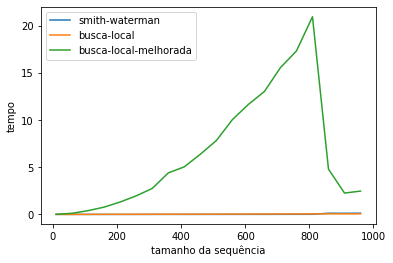

In [61]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência")
plt.ylabel("tempo")

Text(0, 0.5, 'tempo')

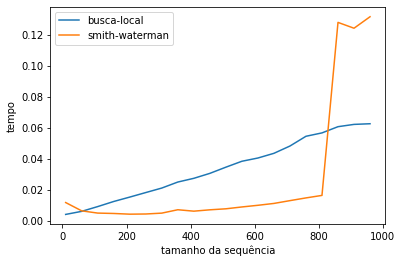

In [66]:
plt.plot(valores,multiIndex_df["busca-local"]["times"].values, label="busca-local")
plt.plot(valores,multiIndex_df["smith-waterman"]["times"].values, label="smith-waterman")
plt.legend()
plt.xlabel("tamanho da sequência")
plt.ylabel("tempo")

Text(0, 0.5, 'valor máximo')

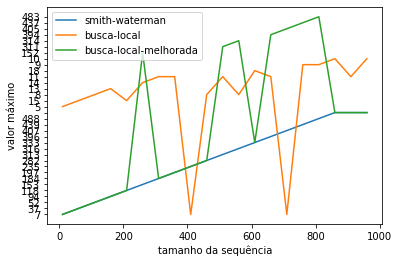

In [63]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência")
plt.ylabel("valor máximo")